In [1]:
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df = pd.read_csv('Data/features_extracted.csv')
df

,is_free,total_recommendations,price,num_languages,num_developers,num_publishers,num_genres,num_categories,lang_Afrikaans,lang_Albanian,...,developers_6,developers_7,developers_8,developers_9,developers_10,developers_11,developers_12,developers_13,developers_14,developers_15
0,False,157570,999.0,8,1,1,1,6,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000
1,False,21453,499.0,4,1,1,1,5,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000
2,False,102430,999.0,8,1,1,1,11,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000
3,False,19364,999.0,8,1,1,1,4,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000
4,False,15826,499.0,3,1,1,1,3,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90430,False,0,99.0,1,1,1,2,3,False,False,...,1.0,0.0,0.0,0.0,1.0,1.0,0.000000,1.000000,0.000000,1.000000
90431,True,0,0.0,1,9,1,2,2,False,False,...,0.0,0.0,1.0,1.0,1.0,0.0,0.777778,0.555556,0.555556,0.444444
90432,False,0,499.0,8,1,1,2,8,False,False,...,1.0,1.0,1.0,0.0,1.0,0.0,1.000000,0.000000,1.000000,0.000000
90433,False,0,1399.0,3,1,1,2,2,False,False,...,1.0,1.0,0.0,0.0,1.0,1.0,1.000000,1.000000,1.000000,0.000000


In [3]:
def visualize_distribution(prices):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
    fig.suptitle('Distribution')
    sns.histplot(prices, ax=ax1, bins=50, kde=True)
    ax2.boxplot(prices)
    plt.show()

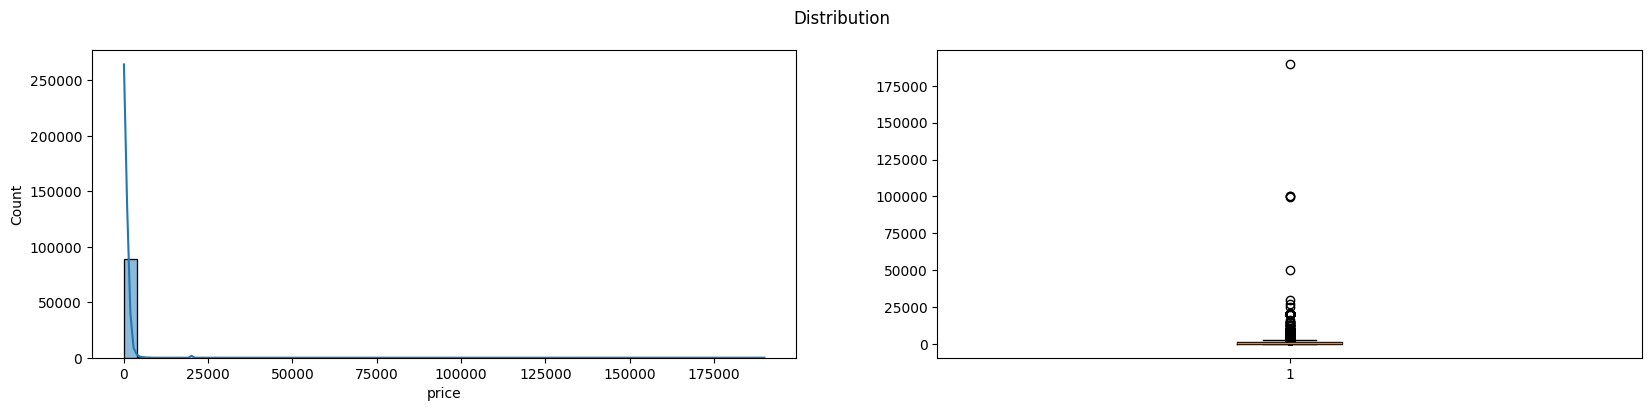

In [4]:
visualize_distribution(df['price'])

In [5]:
df['price_log'] = np.log1p(df['price'])

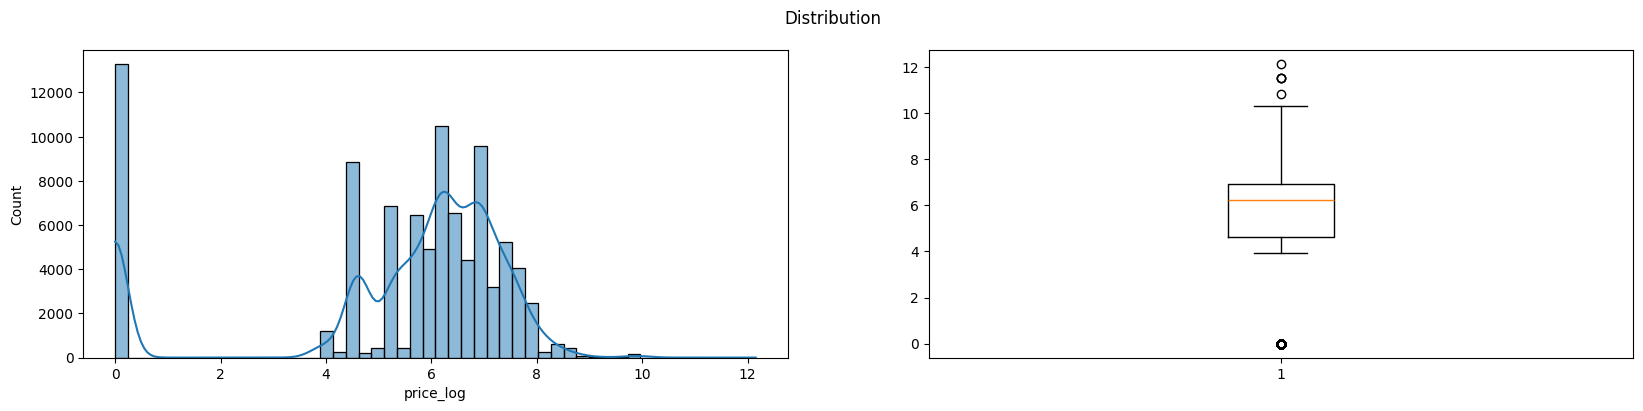

In [6]:
visualize_distribution(df['price_log'])

In [7]:
correlation_matrix = df.drop(columns=['price']).corr()
target_correlation = correlation_matrix['price_log'].drop('price_log')

In [8]:
filtered_correlation = target_correlation[target_correlation.abs() > 0.2]

In [9]:
filtered_features = filtered_correlation.index.tolist()
filtered_df = df[filtered_features + ['price_log']]
filtered_correlation_matrix = filtered_df.corr()
filtered_correlation_matrix.columns

Index(['is_free', 'num_categories', 'gen_Free To Play', 'cat_Family Sharing',
       'cat_In-App Purchases', 'price_log'],
      dtype='object')

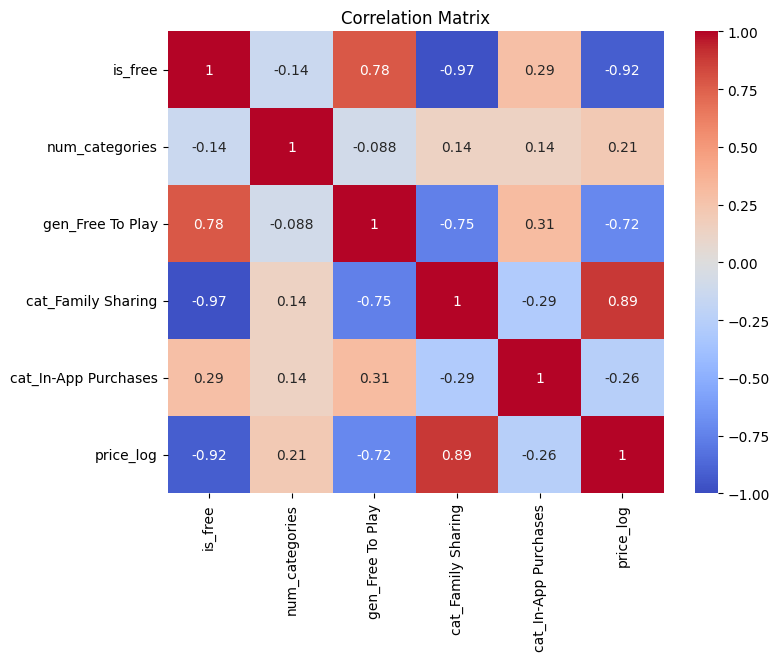

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [11]:
X = df.drop(columns=['price', 'price_log'])
y = df['price_log']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
def evaluate(model, X_test, y_test):
    r2 = cross_val_score(model, X_test, y_test, cv=10, scoring='r2')
    mse = cross_val_score(model, X_test, y_test, cv=10, scoring='neg_mean_squared_error')
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)
    print(f"Variance of price: {np.var(y_test)}")
    print(f"Mean of price: {y_test.mean()}")
    print(f"Mean Squared Error: {mse.mean():.4f}")
    print(f"R-squared Score: {r2.mean():.4f}")

In [39]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [40]:
evaluate(model, X_train, y_train)
print('====================================')
evaluate(model, X_test, y_test)

Variance of price: 5.804040262193538
Mean of price: 5.33970222649796
Mean Squared Error: -0.6324
R-squared Score: 0.8910
Variance of price: 5.7163538559189595
Mean of price: 5.352944011474489
Mean Squared Error: -0.6424
R-squared Score: 0.8875


In [35]:
param_grid = {
    'n_estimators': [700],
    'learning_rate': [0.5],
    'min_samples_leaf': [30, 40, 50],
    'loss': ['huber', 'quantile', 'squared_error'],
    'alpha': [0.7, 0.8, 0.9, 0.99]
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'alpha': 0.99, 'learning_rate': 0.5, 'loss': 'huber', 'min_samples_leaf': 40, 'n_estimators': 700}


In [41]:
# min_samples_leaf=10 better than 15 in with test set
model = GradientBoostingRegressor(learning_rate=0.5, n_estimators=700, loss='huber', alpha=0.99, min_samples_leaf=40)
model.fit(X_train, y_train)
evaluate(model, X_train, y_train)
print('====================================')
evaluate(model, X_test, y_test)

Variance of price: 5.804040262193538
Mean of price: 5.33970222649796
Mean Squared Error: -0.5782
R-squared Score: 0.9003
Variance of price: 5.7163538559189595
Mean of price: 5.352944011474489
Mean Squared Error: -0.6375
R-squared Score: 0.8884
